In [31]:
import os
import pickle
import scipy
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'figure.figsize': (16, 8)})
from behavenet import get_user_dir, make_dir_if_not_exists
from behavenet.data.utils import get_transforms_paths
from behavenet.data.utils import load_labels_like_latents
from behavenet.fitting.utils import get_expt_dir
from behavenet.fitting.utils import get_session_dir
from behavenet.fitting.utils import get_best_model_version
from behavenet.fitting.utils import get_lab_example
from behavenet.plotting.arhmm_utils import *

from behavenet.fitting.utils import build_data_generator
from behavenet.fitting.eval import export_predictions
from behavenet.models import Decoder
from tqdm import tqdm

import torch
from torch import nn

save_outputs = True  # true to save figures/movies to user's figure directory
format = 'png'  # figure format ('png' | 'jpeg' | 'pdf'); movies saved as mp4


In [32]:
sess_id = 'pupil_msp'
subsample = None

In [33]:
sess_id = 'pupil_msp'
subsample = None

sess_idx = 0
hparams = {
    'data_dir': get_user_dir('data'),
    'save_dir': get_user_dir('save'),
    'model_class': 'cond-ae-msp',
    'ae_model_type': 'conv',
    'ae_experiment_name': 'latent_search',
    'n_ae_latents': 9,
    'experiment_name':'pupil_msp',
    'model_type':'conv',
    'n_max_lags': 8,
    'rng_seed_data': 0,
    'trial_splits': '8;1;1;0',
    'device': 'cuda',
    'as_numpy': 'false',
    'train_frac': 1.0,
    'batch_load': True
}

hparams['neural_ae_experiment_name'] = hparams['experiment_name']
hparams['neural_ae_model_type'] = hparams['model_type']

if subsample:
    hparams['subsample_method'] = 'single'
    hparams['subsample_idxs_name'] = subsample
        
get_lab_example(hparams, 'dipoppa', sess_id)

hparams['session_dir'], sess_ids = get_session_dir(hparams)
expt_dir = get_expt_dir(hparams)


data_generator = build_data_generator(hparams, sess_ids, export_csv=False)

using data from following sessions:
/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP_pupil/MD0ST5/4
constructing data generator...done
Generator contains 1 SingleSessionDatasetBatchedLoad objects:
dipoppa_MSP_pupil_MD0ST5_4
    signals: ['images', 'labels']
    transforms: OrderedDict([('images', None), ('labels', None)])
    paths: OrderedDict([('images', '/home/samsung_2tb_ssd/yoni/data/dipoppa/MSP_pupil/MD0ST5/4/data.hdf5'), ('labels', '/home/samsung_2tb_ssd/yoni/data/dipoppa/MSP_pupil/MD0ST5/4/data.hdf5')])



In [10]:
expt_dir

'/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP_pupil/MD0ST5/4/cond-ae-msp/conv/09_latents/pupil_msp'

In [21]:
print(data_generator.datasets[0][0].keys())

odict_keys(['neural', 'ae_latents', 'batch_idx'])


In [22]:
import random
import time
from behavenet.models.aes import AEMSP
from behavenet.fitting.hyperparam_utils import get_all_params
from behavenet.fitting.utils import create_tt_experiment, _print_hparams

In [23]:
def get_data_generator(hparams):
    if not isinstance(hparams, dict):
        hparams = vars(hparams)

    # print hparams to console
    _print_hparams(hparams)

    # Start at random times (so test tube creates separate folders)
    np.random.seed(random.randint(0, 1000))
    time.sleep(np.random.uniform(1))
    
    hparams['ae_latents_file'] = os.path.join(expt_dir, 'version_3', 'dipoppa_MSP_pupil_MD0ST5_4_latents.pkl') 
    # create test-tube experiment
    hparams, sess_ids, exp = create_tt_experiment(hparams)
    if hparams is None:
        print('Experiment exists! Aborting fit')
        return

    # build data generator
    data_generator = build_data_generator(hparams, sess_ids)

    return data_generator

In [24]:
hparams = get_all_params('grid_search', args=['--data_config', '/home/yoni/.behavenet/decoding_data.json', 
                                              '--model_config', '/home/yoni/.behavenet/decoding_ae_model.json',
                                             '--training_config', '/home/yoni/.behavenet/decoding_training.json', 
                                              '--compute_config', '/home/yoni/.behavenet/decoding_compute.json'])

data_generator = get_data_generator(hparams)


DATA CONFIG:
    lab: dipoppa
    expt: MSP_pupil
    animal: MD0ST5
    session: 1
    sessions_csv: 
    all_source: save
    n_input_channels: 1
    y_pixels: 128
    x_pixels: 256
    use_output_mask: False
    frame_rate: 30.0
    neural_bin_size: 0.03333333333333333
    neural_type: ca
    reg_list: none
    subsample_idxs_group_0: samples
    subsample_idxs_group_1: cell_types
    subsample_idxs_dataset: all
    subsample_method: none
    neural_thresh: 1.0
    approx_batch_size: 200

COMPUTE CONFIG:
    gpus_viz: 0;1
    device: cuda
    tt_n_gpu_trials: 10000
    tt_n_cpu_trials: 100000
    tt_n_cpu_workers: 3

TRAINING CONFIG:
    export_predictions: True
    val_check_interval: 1
    learning_rate: 0.001
    max_n_epochs: 500
    min_n_epochs: 10
    enable_early_stop: True
    early_stop_history: 10
    rng_seed_train: None
    as_numpy: False
    batch_load: True
    rng_seed_data: 0
    train_frac: 1.0
    trial_splits: 8;1;1;0

MODEL CONFIG:
    experiment_name: latent_

FileNotFoundError: [Errno 2] No such file or directory: '/home/samsung_2tb_ssd/yoni/results/dipoppa/MSP_pupil/MD0ST5/4/neural-ae/09_latents/ff/sst85_sample_0-single/grid_search/version_3/meta_tags.pkl'

In [ ]:
# set model info
SESS_ID = 'pupil_msp'
SESS_NUM = '4'

hparams = {
        'data_dir': get_user_dir('data'),
        'save_dir': get_user_dir('save'),
        'model_class': 'cond-ae-msp',
        'ae_model_type': 'cond-ae-msp',
        'ae_experiment_name': 'pupil_msp',
        'n_ae_latents': 9,
        'experiment_name':'pupil_msp',
        'model_type':'conv',
        'n_max_lags': 8,
        'rng_seed_data': 0,
        'trial_splits': '8;1;1;0'
    }

hparams['neural_ae_experiment_name'] = hparams['experiment_name']
hparams['neural_ae_model_type'] = hparams['model_type']

get_lab_example(hparams, 'dipoppa', SESS_ID)

hparams['session_dir'], sess_ids = get_session_dir(hparams)
expt_dir = get_expt_dir(hparams)
    
def get_latents(subsample_method=None, sub_idx_name=None):
    sess_idx = 0
    
    # Get all latents 
    _, latents_file = get_transforms_paths('ae_latents', hparams, sess_ids[sess_idx])
    with open(latents_file, 'rb') as f:
        all_latents = pickle.load(f)
        
    # Get prediction latents
    if subsample_method is not None:
        hparams['subsample_method'] = subsample_method
        hparams['subsample_idxs_name'] = sub_idx_name
        
    _, latent_predictions_file = get_transforms_paths('neural_ae_predictions', hparams, sess_ids[sess_idx])
    with open(latent_predictions_file, 'rb') as f:
        all_latent_predictions = pickle.load(f)

    idxs = set()
    for key in all_latent_predictions['trials']:
        for idx in all_latent_predictions['trials'][key]:
            idxs.add(idx)

    start = 0
    while start not in idxs:
        start += 1
    end = 365
    while end not in idxs:
        end -= 1
    
    print(len(all_latent_predictions['predictions'][6][hparams['n_max_lags']:-hparams['n_max_lags']]))
    all_test_latent_predictions = np.concatenate(
        [all_latent_predictions['predictions'][i][hparams['n_max_lags']:-hparams['n_max_lags']] 
                                                  for i in idxs])
 
    return all_test_latent_predictions, start, end

In [ ]:
latents, start, end = get_latents()
latents.shape

In [25]:
def load_file(file, key=None):
    if not os.path.exists(file):
        raise FileNotFoundError(file + ' does not exist.')

    data = None
    if file.endswith('.npy'):
        data = np.load(file, allow_pickle=True).item()
    elif file.endswith('.mat'):
        data = loadmat(file)

    if key:
        try:
            data = data.get(key)
        except ValueError:
            print('File: ' + file + ' does not contain index: ' + key)

    return data

def load_data(session_id):

    expt_id = '2018-04-04_{}_MD0ST5'.format(session_id)
    root = os.getcwd() + '/../neural_dir'

    # Neural data
    all_neural = load_file(root + '/neural_activity' + expt_id + '.mat', key='neural_activity') 
    info_cells = load_file(root + '/info_cells_MD0ST5_2018-04-04.mat', key='info_cells')

    # Behavioral data
    behavioral_data = load_file(root + '/facemap/MD0ST5/sess_{}/'.format(session_id) + expt_id + '_eye_proc.npy')
    running_raw = load_file(root + '/running_speed' + expt_id + '.mat', key='running_speed')

    # Sequencing data
    bni = load_file(root + '/batch_neural_id' + expt_id + '.mat', key='batch_neural_id')
    bvi = load_file(root + '/batch_video_id' + expt_id + '.mat', key='batch_video_id')
    
    
    return all_neural, info_cells, behavioral_data, running_raw, bni, bvi

In [26]:
neural_sess_id = '1'
all_neural, info_cells, behavioral_data, running_raw, bni, bvi = load_data(neural_sess_id)
pupil_area = behavioral_data['pupil'][0]['area_smooth'][bvi[0][0]:bvi[1][-1]]

In [27]:
class LatentDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_idx, n_lags=4):
        super().__init__()
        
        self.conv = nn.Conv1d(
            in_channels=input_size,
            out_channels=hidden_size,
            kernel_size=n_lags * 2 + 1,  # window around t
            padding=n_lags)  # same output
        
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, 1)
        
        self.n_lags = n_lags
        
        self.latent_idx = latent_idx
        
    def forward(self, x):
        x = self.conv(x.transpose(1, 0).unsqueeze(0)).squeeze().transpose(1, 0)
        x = self.activation(x)
        y = self.output(x)
        
        return y

In [28]:
def get_mean_latents(sess_id, latent_idx):    
    sess_idx = 0
    hparams = {
        'data_dir': get_user_dir('data'),
        'save_dir': get_user_dir('save'),
        'model_class': 'neural-ae',
        'ae_model_type': 'conv',
        'ae_experiment_name': 'latent_search',
        'n_ae_latents': 9,
        'experiment_name':'grid_search',
        'model_type':'ff',
        'n_max_lags': 8,
        'rng_seed_data': 0,
        'trial_splits': '8;1;1;0'
    }

    hparams['neural_ae_experiment_name'] = hparams['experiment_name']
    hparams['neural_ae_model_type'] = hparams['model_type']
    hparams['neural_ae_version'] = 'best'

    get_lab_example(hparams, 'dipoppa', sess_id)

    hparams['session_dir'], sess_ids = get_session_dir(hparams)
    expt_dir = get_expt_dir(hparams)

    ## Get discrete chance performance (accuracy of always predicting the most common training state)
    _, latents_file = get_transforms_paths('ae_latents', hparams, sess_ids[sess_idx])
    with open(latents_file, 'rb') as f:
        all_latents = pickle.load(f)
    mean_ae_latent = np.mean(np.concatenate([all_latents['latents'][i][:, latent_idx] for i in all_latents['trials']['train']]), axis=0)
    
    return mean_ae_latents

In [58]:
latents = data_generator.next_batch('test')
np.mean(latents[0]['ae_latents'].cpu().numpy())

-0.37703708

In [61]:
from behavenet.fitting.utils import get_best_model_and_data
import time
def train_and_test(data_generator, latent_idx, sess_id):
    neural_shape = data_generator.datasets[0][0]['neural'].shape
    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda:0' if use_cuda else 'cpu')
    
    model = LatentDecoder(neural_shape[1], hidden_size=32, latent_idx=latent_idx)
    model.to(device)

    epochs = 10
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(
            model.parameters(), lr=0.001, weight_decay=0.001,
            amsgrad=True)


    # Train
    for epoch in range(epochs):
        data_generator.reset_iterators('train')
        loss_val = 0

        for i_train in range(data_generator.n_tot_batches['train']):
            model.train()
            optimizer.zero_grad()

            data, dataset = data_generator.next_batch('train')
            data = {key: val.to('cuda') for key, val in data.items()}

            predictors = data['neural'][0]

            targets = data['ae_latents'][0][:, model.latent_idx].reshape(-1, 1)
            predictions = model(predictors).reshape(-1, 1)

            loss = criterion(predictions[model.n_lags:-model.n_lags], targets[model.n_lags:-model.n_lags])
            loss.backward()

            if epoch > 0:
                optimizer.step()

            loss_val += loss.item()
            if i_train > 0 and i_train % 100 == 0:
                print('[Epoch %d, Iteration %d-%d], Total Loss: %.4f'% (epoch, i_train-100, i_train, loss_val / 100))
                loss_val = 0
                
    # Test
    model.eval()
    model.to('cpu')
    data_generator.reset_iterators('test')

    avg_test_error = 0
    chance_prediction_error = 0
    for i in range(data_generator.n_tot_batches['test']):
        data, _ = data_generator.next_batch('test')
        predictors = data['neural'][0]
        targets = data['ae_latents'][0][:, model.latent_idx].reshape(-1, 1).detach().numpy()
        predictions = model(predictors).reshape(-1, 1).detach().numpy()

        avg_test_error += np.mean((targets[model.n_lags:-model.n_lags] - predictions[model.n_lags:-model.n_lags])**2)
             
        # Calculate chance error
        ae_mean = get_mean_latents(sess_id, model.latent_idx)
        chance_prediction_error += np.mean((targets[model.n_lags:-model.n_lags] - ae_mean)**2)

        
    avg_test_error /= i
    chance_prediction_error /= i
    
    return avg_test_error, chance_prediction_error

In [62]:
session_results = {}

for sess_id in ['session_1']:
    session_results[sess_id] = {}

    for subsample in ['sst85_sample_0', 'exc85_sample_0']:
        session_results[sess_id][subsample] = {}
        session_results[sess_id][subsample]['mse'] = []
        session_results[sess_id][subsample]['chance'] = []

        sess_idx = 0
        hparams = {
            'data_dir': get_user_dir('data'),
            'save_dir': get_user_dir('save'),
            'model_class': 'neural-ae',
            'ae_model_type': 'conv',
            'ae_experiment_name': 'latent_search',
            'n_ae_latents': 9,
            'experiment_name':'grid_search',
            'model_type':'ff',
            'n_max_lags': 8,
            'rng_seed_data': 0,
            'trial_splits': '8;1;1;0'
        }

        hparams['neural_ae_experiment_name'] = hparams['experiment_name']
        hparams['neural_ae_model_type'] = hparams['model_type']

        if subsample:
            hparams['subsample_method'] = 'single'
            hparams['subsample_idxs_name'] = subsample

        get_lab_example(hparams, 'dipoppa', sess_id)

        hparams['session_dir'], sess_ids = get_session_dir(hparams)
        expt_dir = get_expt_dir(hparams)


        model, data_generator = get_best_model_and_data(hparams, Decoder, load_data=True, version='best')

        for i in range(9):
            print('='*50 + '\nTesting Latent Index: %d\n'%i + '='*50)
            start = time.time()
            avg_test_error, chance_prediction_error = train_and_test(data_generator, latent_idx=i, sess_id=sess_id)
            session_results[sess_id][subsample]['mse'].append(avg_test_error)

            session_results[sess_id][subsample]['chance'].append(chance_prediction_error)
            end = time.time()
            print('='*50 + '\nTest Error: %f, Chance Prediction: %f // Total time taken: %.2f\n\n'%(avg_test_error, chance_prediction_error, end-start))


Loading model defined in /home/samsung_2tb_ssd/yoni/results/dipoppa/full_trial/MD0ST5/1/neural-ae/09_latents/ff/sst85_sample_0-single/grid_search/version_0/meta_tags.pkl
Testing Latent Index: 0
[Epoch 0, Iteration 0-100], Total Loss: 20.4487
[Epoch 0, Iteration 100-200], Total Loss: 18.3542


KeyboardInterrupt: 

<Figure size 1152x576 with 0 Axes>

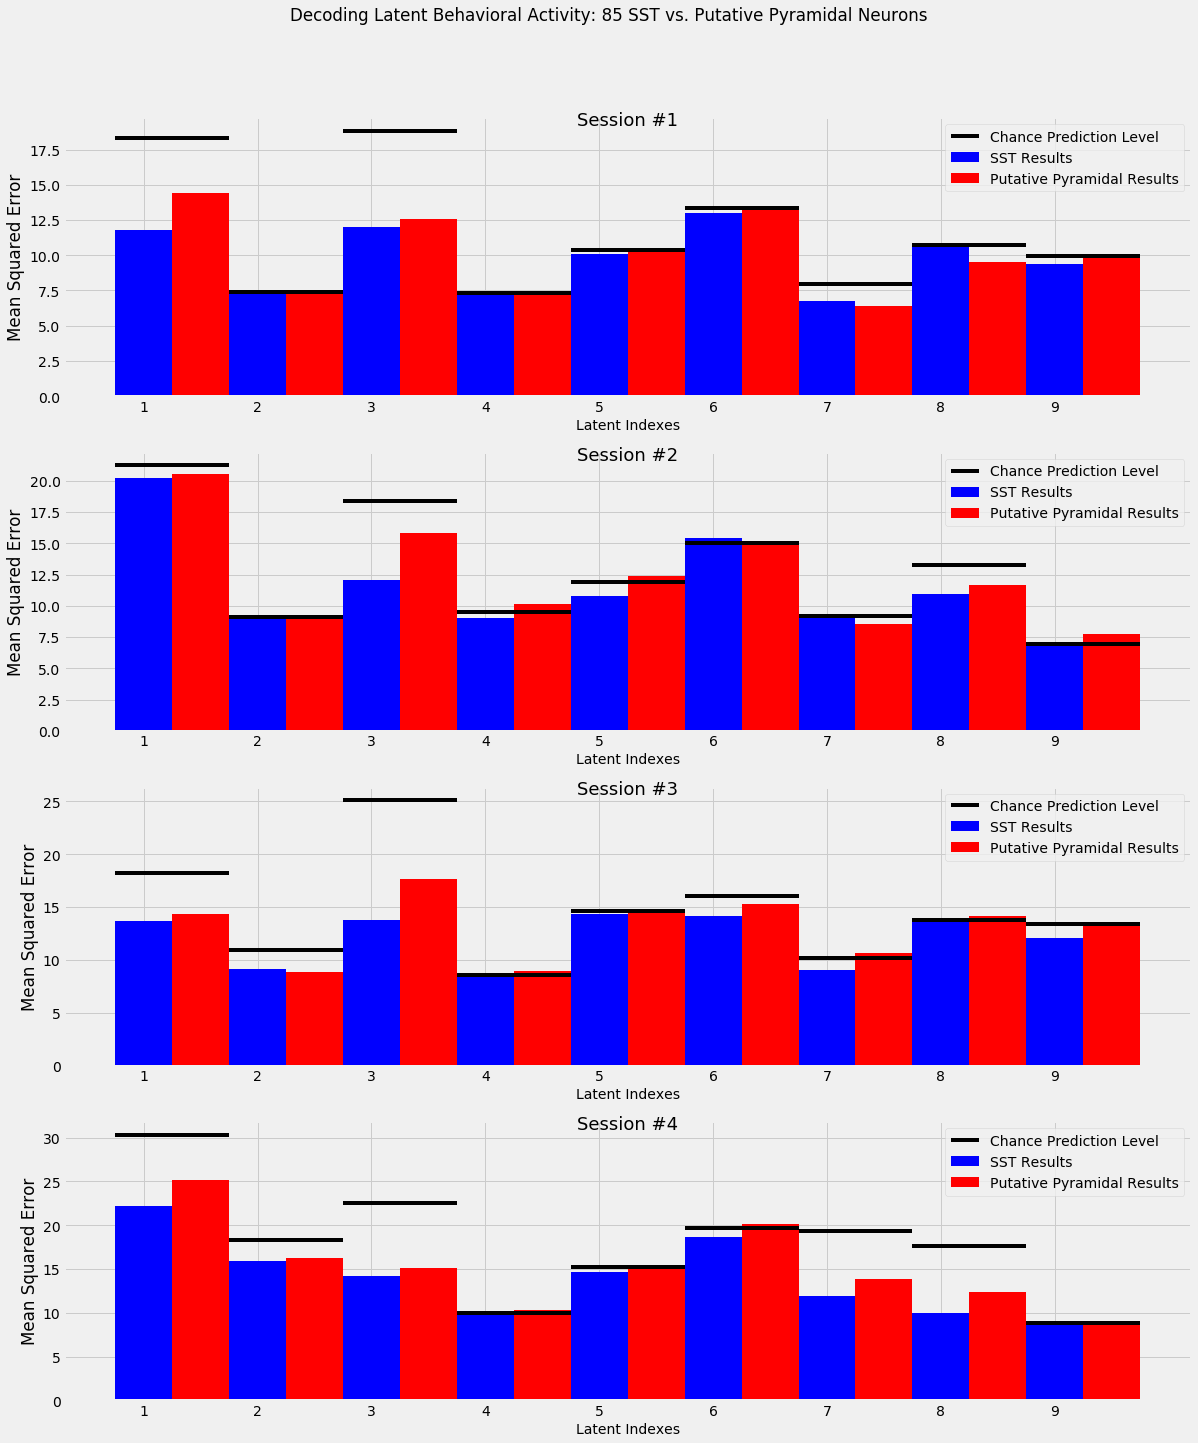

In [180]:
plt.style.use('fivethirtyeight')
plt.tight_layout()

fig, axs= plt.subplots(4, figsize=(18,22))

for i, key in enumerate(session_results):
    
    indxs = np.arange(1, 10)
    width = 0.5
    
    ax = axs[i]
    sst_results = session_results[key]['sst85_sample_0']['mse']
    exc_results = session_results[key]['exc85_sample_0']['mse']
    
    ax.bar(indxs, sst_results, width, color='b', label='SST Results')
    
    ax.bar(indxs + width, exc_results, width, color='r', label='Putative Pyramidal Results')
    
    ax.set_title('Session #%d' %(i+1), size=18, pad=-8)
    ax.set_xticks(range(1,10))
    ax.set_xlabel('Latent Indexes', size=14)
    ax.set_ylabel('Mean Squared Error')
    

    ax.hlines(session_results[key]['sst85_sample_0']['chance'], 
           xmin=[0.75, 1.75,  2.75, 3.75, 4.75, 5.75, 6.75, 7.75, 8.75, 9.75], 
           xmax=[1.75, 2.75 ,3.75, 4.75, 5.75, 6.75, 7.75, 8.75, 9.75], 
           color='black', label='Chance Prediction Level')

    
    
    ax.legend()

plt.suptitle('Decoding Latent Behavioral Activity: 85 SST vs. Putative Pyramidal Neurons', y=.95)
plt.show()